In [29]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.transform import resize
import math
from skimage.feature import hog
import numpy as np
import glob

In [30]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

import cv2  # importing cv
import imutils
import os
  
  


(171, 560, 4)


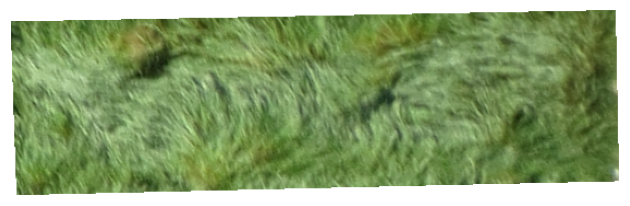

[49 68 30  0]


In [31]:
# reading the image
img = imread('20160607_mm_ebee_rgb_transparent_mosaic_group1_ROI_61.tif')
img2 = imread('200612mfso_transparent_mosaic_group1_ROI_1.tif')
# read an image as input using OpenCV

plt.axis("off")
plt.imshow(img)
#plt.imshow(img)
print(img.shape)
plt.tight_layout()
plt.show()
print(img[1][0])

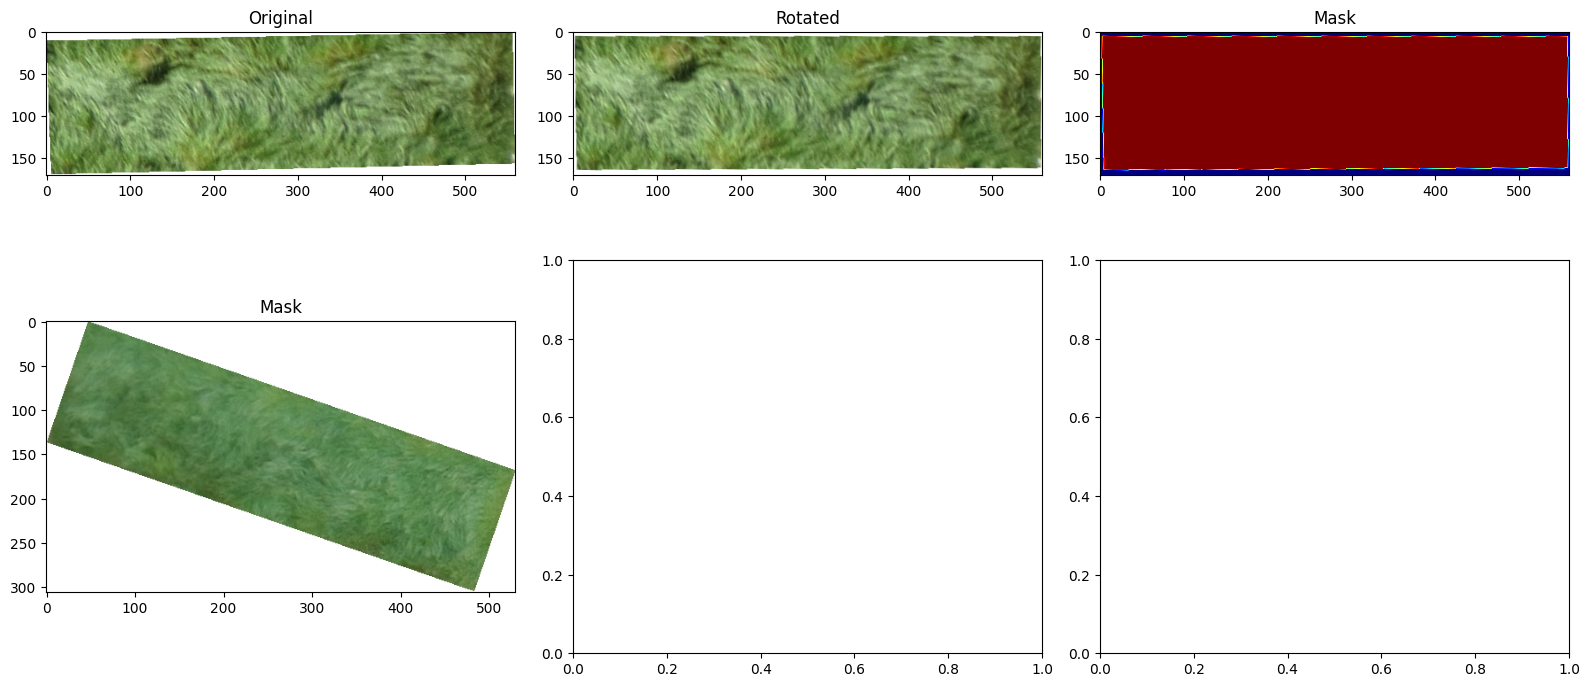

In [32]:
(fig, axs) = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
rotated_img = imutils.rotate(img, angle=-1.0850176194974108)
rotated_img2 = imutils.rotate(img, angle=-1.0850176194974108+45)
# plot each of the images
axs[0][0].imshow(img, cmap="gray")
axs[0][1].imshow(rotated_img, cmap="jet")
axs[0][2].imshow(rotated_img[:,:,3], cmap="jet")
axs[1][0].imshow(img2, cmap="jet")
#axs[1][1].imshow(rotated_img[:,:,3] == 255, cmap="jet")
# set the titles of each axes
axs[0][0].set_title("Original")
axs[0][1].set_title("Rotated")
axs[0][2].set_title("Mask")
axs[1][0].set_title("Mask")
# loop over each of the axes and turn off the x and y ticks
#for i in range(0, 3):
#	axs[i].get_xaxis().set_ticks([])
#	axs[i].get_yaxis().set_ticks([])
# show the plots
plt.tight_layout()
plt.show()

In [33]:
print(img.shape)
n_c = len(img)
n_r = len(img[0])
print("number collums = ",len(img), "number rows = ",len(img[0]))

def find_left_corner (img):
    n_c = len(img[0])
    n_r = len(img)
    for c in range(n_c):
        for r in range(n_r):
            if (img[r][c][3] == 255):
                #print("r =" ,r, "c =" ,c)
                return r, c

def find_right_corner (img):
    n_c = len(img[0])
    n_r = len(img)
    for r in range(n_r):
        for c in range(n_c):
            if (img[r][c][3] == 255):
                #print("r =" ,r, "c =" ,c)
                return r, c

r1, c1 = find_left_corner (img)
r2, c2 = find_right_corner (img)
print(r1, c1, r2, c2)
a = r1 - r2
c = c2 - c1
print("a = ", a, "c = ", c)
angle = np.degrees(np.arctan(a/c))
angle

(171, 560, 4)
number collums =  171 number rows =  560
11 1 1 529
a =  10 c =  528


1.0850176194974108

In [34]:

def fix_mask(img, n_r, n_c, ign):
    for c in range(n_c):
        for r in range(n_r):
            if (img[r][c][3] < 255):
                img[r][c][3] = 0
    return img
    
def top_pix(img, n_r, n_c, ign):
    top = 0
    for r in range(n_r):
        if not(0 in img[r,ign:n_c-ign,3]):
            return r
    return top
def buttom_pix(img, n_r, n_c, ign):
    top = 0
    for r in range(n_r-1,0,-1):
        if not(0 in img[r,ign:n_c-ign,3]):
            return r
    return top
def left_pix(img, n_r, n_c, ignT, ignB):
    top = 0
    for c in range(n_c):
        if not(0 in img[ignT:ignB,c,3]):
            return c
    return top
def right_pix(img, n_r, n_c, ignT, ignB):
    top = 0
    for c in range(n_c-1, 0, -1):
        if not(0 in img[ignT:ignB,c,3]):
            return c
    return top
def instanciate(img, ign):
    n_c = len(img[0])
    n_r = len(img)
    img = fix_mask(img, n_r, n_c, ign)
    top = top_pix(img, n_r, n_c, ign)
    buttom = buttom_pix(img, n_r, n_c, ign)
    right = right_pix(img, n_r, n_c, top + ign, buttom-ign)
    left = left_pix(img, n_r, n_c, top + ign, buttom-ign)
    return top, buttom, left, right
print(0 in (rotated_img[12:159,4:534, 3]))

instanciate(rotated_img, 20)

False


(7, 161, 5, 556)

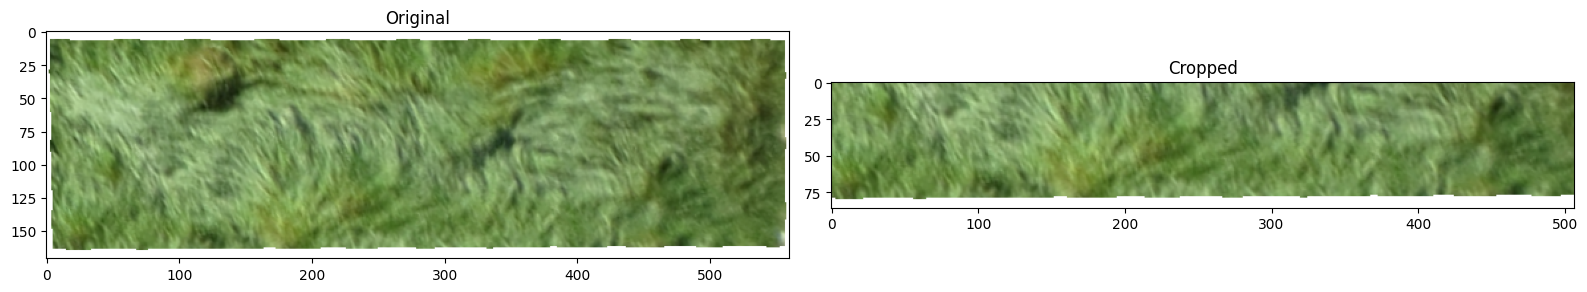

In [35]:
(fig, axs) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# plot each of the images
axs[0].imshow(rotated_img, cmap="gray")
axs[1].imshow(rotated_img[85:223,12:519], cmap="jet")
#axs[1][1].imshow(rotated_img[:,:,3] == 255, cmap="jet")
# set the titles of each axes
axs[0].set_title("Original")
axs[1].set_title("Cropped")

# loop over each of the axes and turn off the x and y ticks
#for i in range(0, 3):
#	axs[i].get_xaxis().set_ticks([])
#	axs[i].get_yaxis().set_ticks([])
# show the plots
plt.tight_layout()
plt.show()

In [36]:
#This function take a list of images and rotates them to fit the x axis
def it_rotate_img(img_list):
    for i in range(len(img_list)):
        r1, c1 = find_left_corner (img_list[i])
        r2, c2 = find_right_corner (img_list[i])
        a = r1 - r2
        c = c2 - c1
        angle = np.degrees(np.arctan(a/c))
        #Decides wether the picture i tilted to the right or 
        # to the left and adds 90 degrees if it is tilted to the left
        if (c2 < 200):
            img_list[i] = imutils.rotate(img_list[i], angle=-angle-90)
        else:
            img_list[i] = imutils.rotate(img_list[i], angle=-angle)
        plt.imshow(img_list[i])
    return img_list

def it_crop_img(img_list):
    for i in range (len(img_list)):
        current_img = img_list[i]
        top, buttom, left, right = instanciate(current_img, 20)
        print(top, buttom, left, right)
        img_list[i] = current_img[top:buttom, left:right]
        if (0 in img_list[i][:,:, 3]):
            #print ("CROP FAILURE on ", 166+i, "RETRIES WITH IGNORE VALUE 0")
            current_img = img_list[i]
            top, buttom, left, right = instanciate(current_img, 0)
            img_list[i] = current_img[top:buttom, left:right]
            if (0 in img_list[i][:,:, 3]):
                print ("CROP FAILURE on ", 166+i)
    return img_list

def it_hog(img_list):
    for i in range (len(img_list)):
        fd, hog_image = hog(img_list[i], orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, multichannel=True)
        #plt.axis("off")
        #plt.imshow(hog_image, cmap="gray")
        img_list[i] = hog_image
    return img_list

def save_img_list(img_list, path, names):
    for i in range (len(img_list)):
        try:
            plt.imsave(path + "processed_img_" + os.path.basename(names[i]) + '.jpeg', np.ascontiguousarray(img_list[i]))
        except Exception as e:
                print('Save Failure On: ' + os.path.basename(names[i]) + '\n' + 'With Failure: ' + str(e))

def reshape(img_list):
    r,c = find_mean_shape(img_list)
    for i in range(len(img_list)):
        img_list[i] = cv2.resize(img_list[i], (c, r))
    return img_list

def find_mean_shape(img_list):
    n = len(img_list)
    mean_c = 0
    mean_r = 0
    for i in range(n):
        mean_r += img_list[i].shape[0]
        mean_c += img_list[i].shape[1]
    return int(np.floor((mean_r/n)/8)*8), int(np.floor((mean_c/n)/8)*8)


In [37]:

#Load all pictures in the folder
def read_img(img_list, img):
    n = imread(img)
    img_list.append(n)
    return img_list
def load_name_and_img(path):
    names = glob.glob(path + "\*.tif")
    img_list_names = []
    img_list= []
    cv_image = [read_img(img_list, img) for img in names]
    return img_list, names


7 161 5 556
8 164 3 549


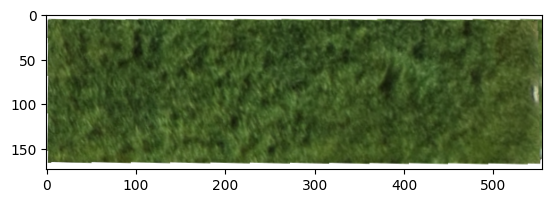

In [38]:

def it_process(img_list, names):
    img_list = it_rotate_img(img_list)
    img_list = it_crop_img(img_list)
    img_list = reshape(img_list)
    save_img_list(img_list, "cropped/", names)
img_list, names = load_name_and_img('img')
it_process(img_list[0:2], names)
    

(134, 528, 4)


C:\Users\marti\AppData\Local\Temp\ipykernel_30156\829671942.py:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


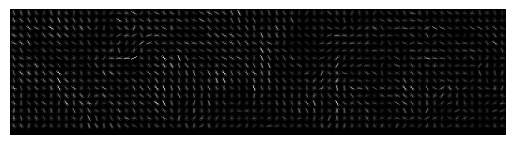

In [39]:
#creating hog features
resized_img = rotated_img[10:144,7:535]
print(resized_img.shape)
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
#plt.imsave("resized_img.jpg", resized_img)
#plt.imsave("hog_image.jpg", hog_image, cmap="gray")